In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Load your saved NumPy data
# gamma = .025
data = pd.read_csv('analog_sine_100mHzv2.csv')

In [78]:
# Sampling rate info
Fs = 16.0                      # Hz
Ts = 1 / Fs                    # seconds
n_samples = data.shape[0]      # number of samples

# Create time vector
time = np.arange(0, n_samples*Ts, Ts)
data.insert(0, "time", time)

In [79]:
# clean up bad values and replace with centered average
clean_data = data.copy()
columns = data.columns
for col in columns:
    bad_mask = (
        (clean_data[col].isna()) |
        (np.isinf(clean_data[col])) |
        (np.abs(clean_data[col]) > 1e2)
    )
    clean_data = clean_data[~bad_mask]


Text(7, 5, 'Gamma=0.025')

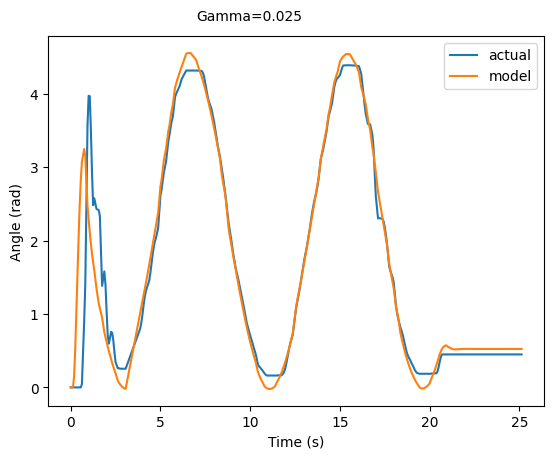

In [80]:
# plot angles
plt.plot(clean_data["time"], clean_data["y_measured"])
plt.plot(clean_data["time"], clean_data["x1m"])
plt.legend(["actual", "model"])
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.text(7, 5, "Gamma=0.025")

Text(7, 0.15, 'Gamma=0.025')

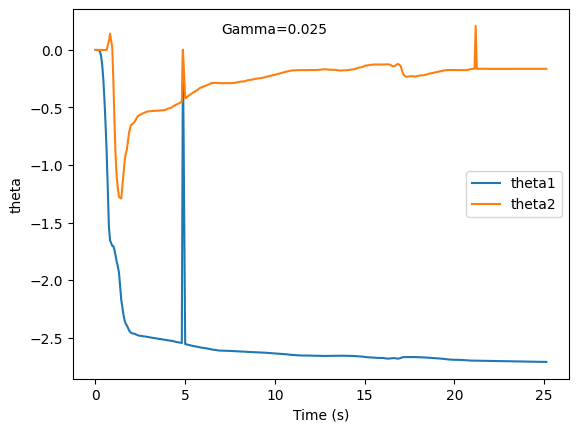

In [81]:
# plot angles
plt.plot(clean_data["time"], clean_data["theta1"])
plt.plot(clean_data["time"], clean_data["theta2"])
plt.legend(["theta1", "theta2"])
plt.xlabel("Time (s)")
plt.ylabel("theta")
plt.text(7, .15, "Gamma=0.025")
